<a id='start'></a>
# Lezione 4 - Machine Learning

In questo notebook vengono presentati i concetti delel reti neurali e del machine learning.

- [Introduzione alle Reti Neurali](#section1)<br>
    - [I tipi di reti neurali](#section1-1)
    - [Struttura di una rete neurale](#section1-2)
    - [Funzioni di attivazione](#section1-3)
    - [Reti neurali e algebra lineare](#section1-10)
    - [Gli algoritmi di ottimizzazione](#section1-4)
    - [La funzione obiettivo](#section1-6)
    - [Algoritmo di ottimizzazione](#section1-7)
    - [Apprendere i parametri](#section-1-8)
- [Cataloghiamo Iris](#section2)
    - [TensorFlow e Keras](#section2-1)
    - [pyTorch](#section2-2)
- [Riconosciamo la scrittura](#section3)<br>

<a id='section1'></a>
## Introduzione alle Reti Neurali

In questo corso abbiamo già fatto uso di Reti Neurali senza averne visto nel dettaglio il funzionamento e le caratteristiche.

Un algoritmo di Machine learning può essere visto come una black box che riceve degli input e produce degli output. Per esempio potremmo creare un modello che predice il tempo metereologico di domani, partendo da alcuni dati metereologici sugli ultimi giorni passati.

<img src="img/ml.png" width="50%">

La "black box" è infatti un modello matematico. L'algoritmo di machine learning seguirà una sorta di metodo a prove ed errori per individuare il modello che meglio stimi gli output, dati gli input.

Una volta creato il modello, questo modello deve essere **addestrato**. L'addestramento è il processo attraverso il quale il modello **apprende** come dare un senso ai dati di input.

<a id='section1-1'></a>
### I tipi di reti neurali

Abbiamo visto nella prima lezione introduttiva che esistono tre tipi di Machine Learning:

1) **Supervised**: questo metodo viene chiamato supervisionato poiché forniamo all'algoritmo non solo gli input, ma anche gli obiettivi, ovvero gli output desiderati. Questo apprendimento automatico supervisionato è stato al centro di quasi tutti gli esempi che abbiamo visto finora.<br>
  Sulla base di tali informazioni, l'algoritmo impara a produrre output il più vicino possibile agli obiettivi.<br>
  La funzione obiettivo nell'apprendimento supervisionato è chiamata *loss function* (anche costo o errore). Stiamo cercando di ridurre al minimo la perdita in quanto minore è la funzione di perdita, maggiore è la precisione del modello.<br>
  Metodi comuni:
    - Regressione
    - Classificazione
  
  
2) **Unsupervised**: nell'apprendimento automatico senza supervisione, il modello viene alimentato con gli input, ma non con obiettivi. Al modello viene invece cheisto di trovare una sorta di dipendenza o logica sottostante nei dati forniti.<br>
  Ad esempio, potremmo avere i dati finanziari per 100 paesi. Il modello riesce a dividerli (cluster) in 5 gruppi. Esaminate quindi i 5 cluster e giungete alla conclusione che i gruppi sono: “Developed”, “Developing but overachieving”, “Developing but underachieving”, “Stagnating”, e “Worsening”.<br>
  L'algoritmo ha diviso i paesi in 5 gruppi in base alle somiglianze dei loro dati osservati, ma non è in grado di sapere quali somiglianze ha ravvisato e quindi quali gruppi sono emersi dalla clusterizzazione.. Potrebbe averli divisi per posizione invece.<br>
  Metodi comuni:
    - Clustering


3) **Reinforcement**: nel ML reinforcement, l'obiettivo dell'algoritmo è massimizzare la sua ricompensa. Questo metodo è ispirato dal comportamento umano e dal modo in cui le persone cambiano le loro azioni in base a degli incentivi: ottenere una ricompensa o evitare la punizione.<br>
  La funzione obiettivo è chiamata funzione di ricompensa, la fase di apprendimento del modello mira a massimizzare la funzione di ricompensa.<br>
  Un esempio è un computer che gioca a Super Mario. Più alto è il punteggio raggiunto, migliore è il rendimento. Il punteggio in questo caso è la funzione obiettivo.<br>
  Metodi comuni:
    - Processo decisionale
    - Sistema di ricompensa

<a id='section1-2'></a>
### Struttura di una rete neurale

In generale, le reti neurali sono un metodo di apprendimento automatico che accetta un input X e lo utilizza per prevedere un output di Y. Ad esempio, dati i prezzi delle scorte della settimana passata come input, il mio algoritmo di NN proverà a prevedere il prezzo delle azioni del giorno successivo.

Dato un grande set di dati di coppie di input e output, un algoritmo di NN proverà a minimizzare la differenza tra la sua previsione e l'output atteso. In questo modo, cerca di apprendere l'associazione / modello tra input e output dati - questo a sua volta consente a un modello di deep learning di generalizzare a input che non ha mai visto prima.


Gli algoritmi di reti neurali cercano le  associazioni tra un insieme di input e output. La struttura di base è la seguente:

<img src="img/dl.jpg">

Una rete neurale è composta da input, hidden e livelli di output, tutti composti da "nodi". I livelli di input comprendono una rappresentazione numerica dei dati (ad esempio immagini con specifiche dei pixel), le previsioni di output dei livelli di output, mentre i livelli nascosti sono correlati con la maggior parte del calcolo.

Alla base di una rete neurale vi è un processo di regressione e quindi di algebra lineare.
Le reti neurali si basano principalmente sulla simulazione di neuroni artificiali opportunamente collegati. Il modello rappresentato in figura è quello proposto da McCulloch e Pitts.

<img src="img/neurone.png">

<img src="img/neuron.png">

<a id='section1-3'></a>
### Funzioni di attivazione

Lo scopo di ciascun nodo nella rete neurale feed forward consiste nell’accettare valori di input e immettere un valore di output nello strato immediatamente successivo. I nodi di input inseriscono i valori delle variabili nello strato nascosto senza modificarli. 
Ogni nodo di uno strato nascosto riceve l’input dai nodi connessi dello strato precedente (output del nodo moltiplicato per il peso della connessione), combina tali valori in un valore singolo che utilizza come input della funzione di attivazione. 
La funzione di attivazione deve soddisfare alcuni criteri: 

- deve avere valori di output compresi nell’intervallo {0, 1}; 
- deve fornire un valore di output vicino ad 1 quando viene sufficientemente stimolata (effetto soglia), per propagare l’attività all’interno della rete (come avviene per i neuroni naturali). 

La cosiddetta funzione sigmoide soddisfa entrambi questi criteri ed è calcolata come segue: 

$$F(x) = {1 \over {1 + e ^ {-x}}}$$

Grafico della funzione sigmoide: 
<img src="img/sigmoide.png">

Altri esempi di funzioni di attivazione sono visibli qui [su WikiPedia](https://en.wikipedia.org/wiki/Activation_function).

<a id='section1-10'></a>
### Reti neurali e algebra lineare
Costruiamo ora una rete neurale a 3 strati con un livello di input, un livello nascosto e un livello di output. Il numero di nodi nel livello di input è determinato dalla dimensionalità dei nostri dati, 2.

Analogamente, il numero di nodi nel livello di output è determinato dal numero di classi che abbiamo, ancora 2. (Poiché abbiamo solo 2 classi potrebbe effettivamente farla franca con un solo nodo di output che prevede 0 o 1, ma avere 2 rende più semplice estendere la rete a più classi in seguito).

L'input alla rete sarà le coordinate x e y e il suo output sarà due probabilità, una per la classe 0 ("femmina") e una per la classe 1 ("maschio").

Viene quindi qualcosa del genere:

<img src='img/nn-from-scratch-3-layer-network-1024x693.png' width=400>

Possiamo scegliere la dimensionalità (il numero di nodi) del livello nascosto. Più nodi inseriamo nello strato nascosto le funzioni più complesse che saremo in grado di adattare. Ma una maggiore dimensionalità ha un costo. Innanzitutto, sono necessari più calcoli per fare previsioni e imparare i parametri di rete. Un numero maggiore di parametri significa anche che diventiamo più inclini a sovraperformare i nostri dati.

Come scegliere la dimensione del livello nascosto? Mentre ci sono alcune linee guida e raccomandazioni generali, dipende sempre dal tuo problema specifico ed è più un'arte che una scienza. In seguito giocheremo con il numero di nodi nel livello nascosto e vediamo come influisce sul nostro output.

Dobbiamo anche scegliere una *funzione di attivazione* per il nostro livello nascosto. La funzione di attivazione trasforma gli input del layer nelle sue uscite. Una funzione di attivazione non lineare è ciò che ci consente di adattare ipotesi non lineari. Chocies comuni per le funzioni di attivazione sono [tanh] (https://reference.wolfram.com/language/ref/Tanh.html), [funzione sigmoid] (https://en.wikipedia.org/wiki/Sigmoid_function), o [ReLUs] (https://en.wikipedia.org/wiki/Rectifier_ (neural_networks). Useremo `tanh`, che si comporta abbastanza bene in molti scenari.Una buona proprietà di queste funzioni è che la loro derivata può essere calcolata utilizzando il valore della funzione originale.Ad esempio, la derivata di $ \ tanh x $ è $ 1- \ tanh ^ 2 x $. Ciò è utile perché ci consente di calcolare $ \ tanh x $ una volta e riutilizzare il suo valore più tardi per ottenere la derivata.

Poiché vogliamo che la nostra rete generi probabilità, la funzione di attivazione per il livello di output sarà [softmax] (https://en.wikipedia.org/wiki/Softmax_function), che è semplicemente un modo per convertire i punteggi grezzi in probabilità. Se hai familiarità con la funzione logistica, puoi pensare a softmax come alla sua generalizzazione a più classi.

#### Come la nostra rete realizza delle predizioni

La nostra rete fa previsioni usando *forward propagation*, che è solo un mucchio di moltiplicazioni di matrice e l'applicazione delle funzioni di attivazione che abbiamo definito sopra. Se $ x $ è l'input bidimensionale della nostra rete, calcoliamo la nostra previsione $\hat{y}$ (anche bidimensionale) come segue:

$$
\begin{aligned}
z_1 & = xW_1 + b_1 \\
a_1 & = \tanh(z_1) \\
z_2 & = a_1W_2 + b_2 \\
a_2 & = \hat{y} = \mathrm{softmax}(z_2)
\end{aligned}
$$

$z_i$ è la somma ponderata degli input del layer $i$ (bias incluso) e $a_i$ è l'output del layer $i$ dopo aver applicato la funzione di attivazione. $W_1, b_1, W_2, b_2$ sono parametri della nostra rete, che dobbiamo imparare dai nostri dati di addestramento. Puoi considerarli come matrici che trasformano i dati tra i vari livelli della rete. Osservando le moltiplicazioni della matrice sopra possiamo capire la dimensionalità di queste matrici. Se utilizziamo 500 nodi per il nostro livello nascosto, $W_1 \in \mathbb{R}^{2\times500}$, $b_1\in\mathbb{R}^{500}$, $W_2\in\mathbb{R}^{500\times2}$, $b_2\in\mathbb{R}^{2}$. Ora capisci perché abbiamo più parametri se aumentiamo le dimensioni del livello nascosto.

Alla base di una rete neurale vi è un processo di regressione e quindi di algebra lineare.

I suddetti neuroni ricevono in ingresso degli stimoli e li elaborano. L'elaborazione può essere anche molto sofisticata ma in un caso semplice si può pensare che i singoli ingressi vengano moltiplicati per un opportuno valore detto peso, il risultato delle moltiplicazioni viene sommato e se la somma supera una certa soglia il neurone si attiva attivando la sua uscita. Il peso indica l'efficacia sinaptica della linea di ingresso e serve a quantificarne l'importanza, un ingresso molto importante avrà un peso elevato, mentre un ingresso poco utile all'elaborazione avrà un peso inferiore. Si può pensare che se due neuroni comunicano fra loro utilizzando maggiormente alcune connessioni allora tali connessioni avranno un peso maggiore, fino a che non si creeranno delle connessioni tra l'ingresso e l'uscita della rete che sfruttano "percorsi preferenziali". Tuttavia è sbagliato pensare che la rete finisca col produrre un unico percorso di connessione: tutte le combinazioni infatti avranno un certo peso, e quindi contribuiscono al collegamento ingresso/uscita.

Il modello in figura rappresenta una classica rete neurale pienamente connessa.

<img src="img/rete.png">

Guardando questa rappresentazione simbolica di una rete neurale feed-forward, è facile intuire come il modello descritto sia implementabile con dei semplici calcoli matriciali e quindi con un'equazione lineare.

Infatti:
- l'input I può essere rappresentato come un vettore di dimensione (n)
- i pesi di attivazione delle frecce che collegano i al livello H, possono essere rappresnetati in una matrice (n*k), chiamiamo questa matrice wH
- i pesi delle frecce che dal livello H portano agli output O, possono essere anch'essi rappresentati in una matrice (k*m), chiamiamo questa matrice wO
- le frecce che collegano il livello O con i reali output possono avere dei pesi rappresentati da un vettore di dimensione (m) che chiamiamo bias
- l'ouput O può essere rappresentato come un vettore di dimensione (m)

L'equazione qui rappresentata, quindi, può essere descritta come segue:

    O = I * wh * wO + bias
    
Semplificando le operazioni, possiamo quindi dire di trovarci di fronte a una regressione lineare così fatta:

    O = I * weights + bias
    
<img src="img/equation.png" width="70%">

<a id='section1-4'></a>
### Gli algoritmi di ottimizzazione

La logica alla base della formazione di un algoritmo di ottimizzazione coinvolge quattro ingredienti: dati, modello, funzione obiettivo e algoritmo di ottimizzazione. Sono ingredienti, anziché passaggi, poiché il processo è iterativo.

Per addestrare un modello si utilizza frequentemente un metodo chiamato "stochastic gradient descent" (SGD).
Questo processo prevede 7 passaggi principali:

1. Inizializzare i parametri della rete neurale in modo random
2. Per ogni esempio nel set di dati, utilizzare i parametri per fare una previsione
3. Utilizza queste previsioni per calcolare le prestazioni del modello tramite una "funzione obiettivo"
4. Calcola i "gradienti"
5. Aggiorna tutti i parametri facendo un "passo" nella direzione che minimizza la perdita
6. Ripetere dal passaggio 2
7. Interrompere il processo di apprendimento una volta che il modello ha raggiunto risultati soddisfacenti

<img src="img/ottimizzazione.png" width="90%">

<a id='section1-5'></a>
### La funzione obiettivo

La funzione obiettivo è una misura di quanto bene gli output del nostro modello corrispondono agli obiettivi.
Gli obiettivi sono i "valori corretti" ai quali miriamo.

Le funzioni obiettivo possono essere suddivise in due tipi:
- funzioni di perdita (apprendimento supervisionato), e
- funzioni di ricompensa (apprendimento rinforzato)

Il nostro focus in questo corso sarà l'apprendimento supervisionato.

<img src="img/function.png" width="90%">

<a id='section1-7'></a>
### Algoritmo di ottimizzazione

L'ultimo ingrediente è l'algoritmo di ottimizzazione.

Il più comunemente usato è il *gradient descent*. Il gradient descent è una tecnica che ha lo scopo di minimizzare quanto possibile la cost function. Immaginando la cost funcion come funzione di sole due variabili (per semplificare), lo scopo del nostro gradient descent è quello di trovare il minimo globale della funzione, ovvero il punto più basso. In questo caso semplificato il minimo sembra abbastanza ovvio, ma nella maggior parte dei casi le funzioni sono molto più complesse, e bisogna arrivarci per approssimazioni successive.

Cercando di semplificare al massimo con un’analogia, tutto quello che fa il gradient descent è partire da un punto casuale, e poi in base alle derivate spostarsi in una direzione o in un’altra. Una derivata elevata significa pendenza elevata, quindi ancora lontani dal minimo, e il successivo passo sarà ampio. Una derivata piccola significa pendenza lieve, di conseguenza vicini al minimo, il che comporta passi di avvicinamento più piccoli.

Nella figura si può vedere come il gradiente si avvicini al minimo per passi successivi, riducendo l’ampiezza (che poi altro non è che il tasso di apprendimento) man mano che il fondo si fa più vicino.

<img src="img/descent.png" width=500>

Scegliere uno step di apprendimento (il learning rate) è un passo molto importante:
- un passo troppo piccolo può richiedere troppi passaggi perchè l'apprendimento converga
- un passo troppo grande può possibilmente far divergere la funzione di ricerca del minimo

<img src="img/gd1.png" width=1000>

Inoltre la funzione obiettivo puà avere dei minimi locali che possono portare a una parametrizzazione subottimale del nostro alrgoritmo:

<img src="img/gd2.png" width=600>

Il metodo descritto è quello del Batch Gradient Descent che è di gran lunga il più semplice e stabile. Esitono però alcune varianti che offrono vantaggi significativi:
- Lo **Stochastic Gradient Descent** è un metodo di ottimizzazione usato principalmente per l'addestramento di algoritmi di apprendimento automatico, in particolare le reti neurali. A differenza del tradizionale Gradient Descent, che calcola il gradiente della funzione di perdita rispetto ai parametri del modello usando l'intero set di dati, l'SGD aggiorna i parametri utilizzando solo un singolo esempio di dati (o un piccolo batch) alla volta. In ogni passo, sceglie casualmente un esempio dal set di dati, calcola il gradiente della funzione di perdita basandosi su quell'esempio, e aggiorna i parametri del modello in modo proporzionale al gradiente. Questo processo viene ripetuto per molti passi o "epoche", portando il modello a convergere verso un ottimale set di parametri. L'SGD è efficace per set di dati di grandi dimensioni grazie alla sua efficienza computazionale e capacità di evitare minimi locali durante l'ottimizzazione.
- Il **Mini-batch Gradient Descent** è un metodo di ottimizzazione usato nell'apprendimento automatico che aggiorna i parametri di un modello non con l'intero set di dati (come nel Batch Gradient Descent) né con un singolo esempio (come nello Stochastic Gradient Descent), ma con un piccolo gruppo di esempi, chiamato "mini-batch". Questo approccio equilibra efficacemente l'efficienza computazionale e la stabilità della convergenza, rendendolo molto utilizzato nell'addestramento delle reti neurali.

Questi metodi di discesa del gradiente sono vantaggiosi per diversi motivi:
1. **Velocità di Convergenza**: SGD aggiorna i pesi più frequentemente, dato che lo fa dopo ogni esempio di allenamento (o un piccolo insieme di esempi, nel caso di mini-batch SGD). Questo può portare a una convergenza più rapida rispetto al Batch Gradient Descent, che richiede di passare attraverso l'intero set di dati prima di fare un singolo aggiornamento.

2. **Uso della Memoria**: SGD è più efficiente in termini di memoria. Non ha bisogno di caricare l'intero set di dati in memoria per calcolare il gradiente, il che lo rende utile quando si lavora con set di dati molto grandi.

3. **Evitare Minimi Locali**: La natura stocastica di SGD significa che l'aggiornamento dei pesi è più "rumoroso", il che può aiutare a evitare minimi locali nei problemi di ottimizzazione non convessi, come spesso si incontrano nell'addestramento delle reti neurali.

4. **Generalizzazione**: La variabilità introdotta da SGD può anche aiutare a prevenire l'overfitting, poiché ogni aggiornamento è basato su un sottoinsieme dei dati. Questo può rendere il modello più robusto e migliorare la sua capacità di generalizzazione su dati non visti.

<a id='section1-8'></a>
### Apprendere i parametri

Imparare i parametri per la nostra rete significa trovare parametri ($ W_1, b_1, W_2, b_2 $) che riducano al minimo l'errore sui nostri dati di allenamento. Ma come definiamo l'errore? Chiamiamo la funzione che misura il nostro errore la funzione * loss *. Una scelta comune con l'output di softmax è la [Cross Entropy loss](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_error_function_and_logistic_regression). Se abbiamo $ N $ di training e $ C $, la perdita per la nostra previsione $ \ hat {y} $ rispetto alle vere etichette $ y $ è data da:

$$
\begin{aligned}
L(y,\hat{y}) = - \frac{1}{N} \sum_{n \in N} \sum_{i \in C} y_{n,i} \log\hat{y}_{n,i}
\end{aligned}
$$

La formula sembra complicata, ma tutto ciò che realmente fa è sommare i nostri esempi di addestramento e aggiungere alla perdita se abbiamo previsto la classe sbagliata. Quindi, più lontano $ y $ (le etichette corrette) e $ \ hat {y} $ (le nostre previsioni), maggiore sarà la nostra perdita.

Ricorda che il nostro obiettivo è trovare i parametri che riducono al minimo la nostra funzione di perdita. Possiamo usare [gradiente di discesa](http://cs231n.github.io/optimization-1/) per trovare il minimo. Implementerò la versione più vanigliata della discesa del gradiente, chiamata anche discesa del gradiente batch con un tasso di apprendimento fisso. Variazioni come la discesa SGD (gradiente stocastico) o la discesa con gradiente di minibatch in genere hanno prestazioni migliori nella pratica. Quindi, se sei serio, vorrai usare uno di questi, e idealmente anche [decaderai il tasso di apprendimento nel tempo](http://cs231n.github.io/neural-networks-3/#anneal).

Come input, la discesa del gradiente richiede i gradienti (vettore di derivate) della funzione di perdita rispetto ai nostri parametri: $\frac{\partial{L}}{\partial{W_1}}$, $\frac{\partial{L}}{\partial{b_1}}$, $\frac{\partial{L}}{\partial{W_2}}$, $\frac{\partial{L}}{\partial{b_2}}$. Per calcolare questi gradienti usiamo il famoso *algoritmo di backpropagation*, che è un modo per calcolare in modo efficiente i gradienti a partire dall'output. Non andrò nei dettagli come funziona il backpropagation, ma ci sono molte spiegazioni eccellenti ([qui](http://colah.github.io/posts/2015-08-Backprop/) o [qui](http: // cs231n.github.io/optimization-2/)) fluttuante nel web.

Applicando la formula di backpropagation troviamo quanto segue (credimi su questo):

$$
\begin{aligned}
& \delta_3 = \hat{y} - y \\
& \delta_2 = (1 - \tanh^2z_1) \circ \delta_3W_2^T \\
& \frac{\partial{L}}{\partial{W_2}} = a_1^T \delta_3  \\
& \frac{\partial{L}}{\partial{b_2}} = \delta_3\\
& \frac{\partial{L}}{\partial{W_1}} = x^T \delta_2\\
& \frac{\partial{L}}{\partial{b_1}} = \delta_2 \\
\end{aligned}
$$

<a id='section2'></a>
## Cataloghiamo Iris

Ricorderete il dataset della vostra scorsa che contiene i fiori Iris:

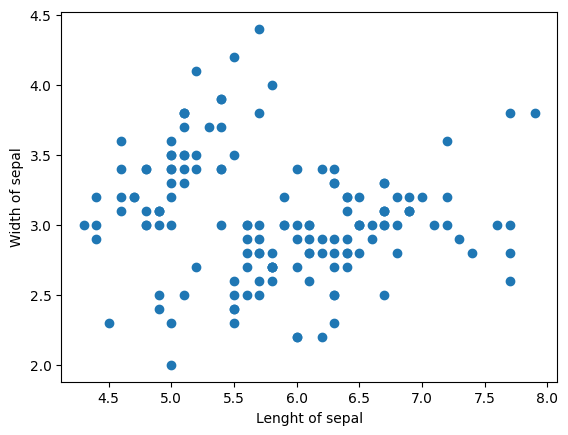

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

iris = pd.read_csv('data/iris-with-answers.csv')

# Create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(iris['sepal_length'], iris['sepal_width'])
# Name your axes
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Possiamo uasre la libreria seaborn per vedere rapidamente quali sono i dati contenuti nel dataset e per produrre dei pairplot:

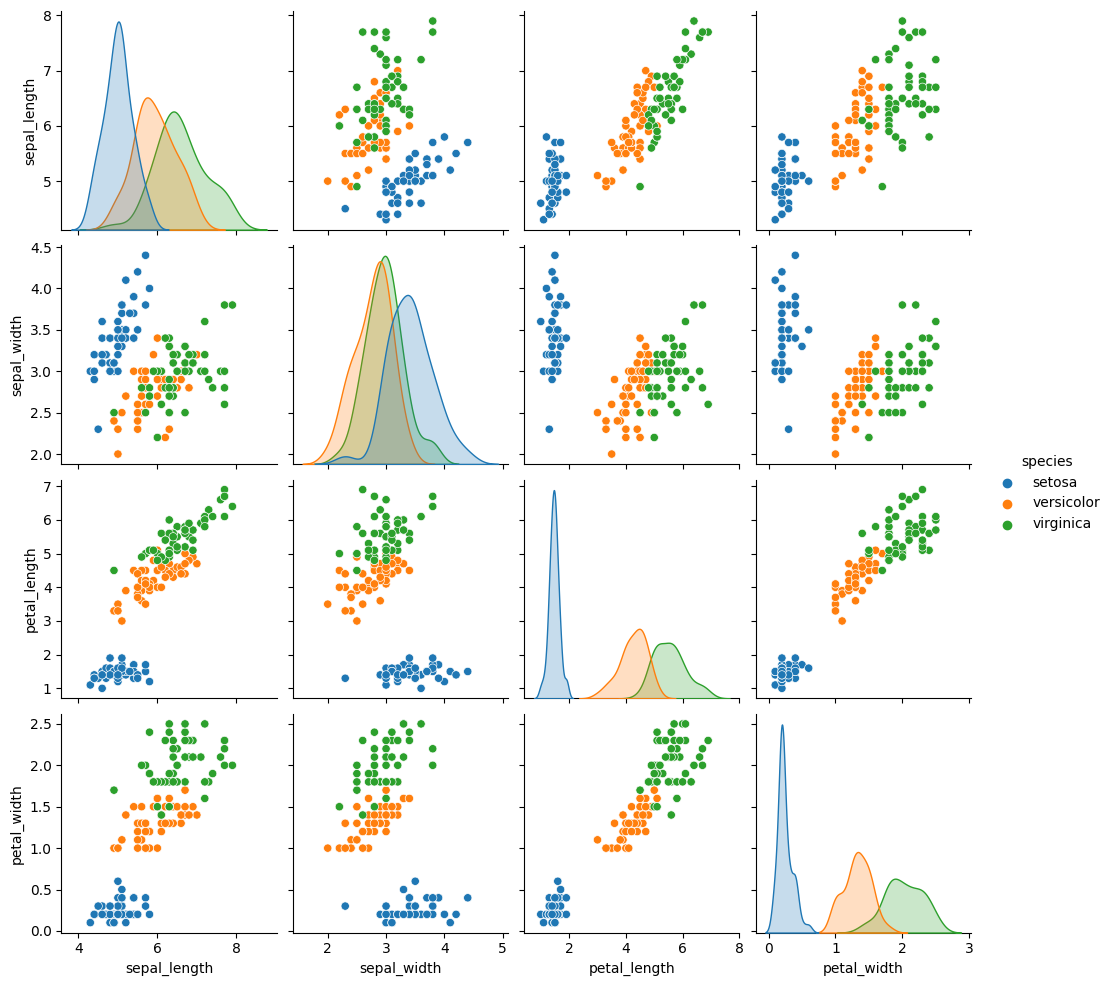

In [4]:
import seaborn as sns
sns.pairplot(data=iris, hue='species')
plt.show()

Selezioniamo le variaibli indipendenti e dipendenti, scaliamole e mappiamo la feature 'species' in modo che possa essere utilizzata come variabile nell'algoritmo di ML:

In [5]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer

X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']

X = StandardScaler().fit_transform(X)
y = LabelBinarizer().fit_transform(y)

Dividiamo il dataset tra training e learning:

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<a id='section2-1'></a>
###  TensorFlow e Keras

Ora proviamo, con Keras, a creare un modello in grado di classificare i fiori nelle 3 specie in base alle caratteristiche del sepalo e del petalo:

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.preprocessing import StandardScaler, LabelBinarizer

Creiamo il modello con Keras aggiungendo i vari layer della nostra rete di deep learning:

In [8]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(12, input_dim=4))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dense(units=15))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dense(units=8))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dense(units=10))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))

criterion = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=criterion, optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test))

2024-01-05 08:49:08.941882: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-05 08:49:09.108957: W tensorflow/core/platform/profile_utils/cpu_utils.cc:118] Failed to find bogomips or clock in /proc/cpuinfo; cannot determine CPU frequency


Epoch 1/400
4/4 [==============================] - 1s 43ms/step - loss: 1.0849 - accuracy: 0.5333 - val_loss: 1.1041 - val_accuracy: 0.3667
Epoch 2/400
4/4 [==============================] - 0s 5ms/step - loss: 1.0586 - accuracy: 0.5250 - val_loss: 1.0760 - val_accuracy: 0.3333
Epoch 3/400
4/4 [==============================] - 0s 7ms/step - loss: 1.0319 - accuracy: 0.5250 - val_loss: 1.0488 - val_accuracy: 0.3000
Epoch 4/400
4/4 [==============================] - 0s 7ms/step - loss: 1.0054 - accuracy: 0.5167 - val_loss: 1.0252 - val_accuracy: 0.3000
Epoch 5/400
4/4 [==============================] - 0s 6ms/step - loss: 0.9798 - accuracy: 0.4917 - val_loss: 1.0054 - val_accuracy: 0.3000
Epoch 6/400
4/4 [==============================] - 0s 7ms/step - loss: 0.9579 - accuracy: 0.4750 - val_loss: 0.9877 - val_accuracy: 0.3000
Epoch 7/400
4/4 [==============================] - 0s 6ms/step - loss: 0.9366 - accuracy: 0.4750 - val_loss: 0.9732 - val_accuracy: 0.3000
Epoch 8/400
4/4 [=========

4/4 [==============================] - 0s 5ms/step - loss: 0.0572 - accuracy: 0.9750 - val_loss: 0.0730 - val_accuracy: 0.9667
Epoch 118/400
4/4 [==============================] - 0s 6ms/step - loss: 0.0565 - accuracy: 0.9833 - val_loss: 0.0752 - val_accuracy: 0.9667
Epoch 119/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0559 - accuracy: 0.9833 - val_loss: 0.0668 - val_accuracy: 0.9667
Epoch 120/400
4/4 [==============================] - 0s 6ms/step - loss: 0.0539 - accuracy: 0.9750 - val_loss: 0.0638 - val_accuracy: 0.9667
Epoch 121/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0555 - accuracy: 0.9750 - val_loss: 0.0589 - val_accuracy: 0.9667
Epoch 122/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0536 - accuracy: 0.9833 - val_loss: 0.0614 - val_accuracy: 0.9667
Epoch 123/400
4/4 [==============================] - 0s 6ms/step - loss: 0.0529 - accuracy: 0.9833 - val_loss: 0.0610 - val_accuracy: 0.9667
Epoch 124/400
4/4 [========

4/4 [==============================] - 0s 5ms/step - loss: 0.0352 - accuracy: 0.9833 - val_loss: 0.0396 - val_accuracy: 0.9667
Epoch 234/400
4/4 [==============================] - 0s 6ms/step - loss: 0.0352 - accuracy: 0.9833 - val_loss: 0.0403 - val_accuracy: 0.9667
Epoch 235/400
4/4 [==============================] - 0s 6ms/step - loss: 0.0350 - accuracy: 0.9833 - val_loss: 0.0400 - val_accuracy: 0.9667
Epoch 236/400
4/4 [==============================] - 0s 6ms/step - loss: 0.0350 - accuracy: 0.9833 - val_loss: 0.0413 - val_accuracy: 0.9667
Epoch 237/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.9833 - val_loss: 0.0432 - val_accuracy: 0.9667
Epoch 238/400
4/4 [==============================] - 0s 6ms/step - loss: 0.0350 - accuracy: 0.9833 - val_loss: 0.0434 - val_accuracy: 0.9667
Epoch 239/400
4/4 [==============================] - 0s 6ms/step - loss: 0.0348 - accuracy: 0.9833 - val_loss: 0.0428 - val_accuracy: 0.9667
Epoch 240/400
4/4 [========

4/4 [==============================] - 0s 6ms/step - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.0353 - val_accuracy: 0.9667
Epoch 350/400
4/4 [==============================] - 0s 6ms/step - loss: 0.0265 - accuracy: 0.9833 - val_loss: 0.0330 - val_accuracy: 0.9667
Epoch 351/400
4/4 [==============================] - 0s 6ms/step - loss: 0.0275 - accuracy: 0.9833 - val_loss: 0.0319 - val_accuracy: 1.0000
Epoch 352/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0259 - accuracy: 0.9833 - val_loss: 0.0346 - val_accuracy: 0.9667
Epoch 353/400
4/4 [==============================] - 0s 6ms/step - loss: 0.0259 - accuracy: 0.9833 - val_loss: 0.0376 - val_accuracy: 0.9667
Epoch 354/400
4/4 [==============================] - 0s 6ms/step - loss: 0.0264 - accuracy: 0.9917 - val_loss: 0.0390 - val_accuracy: 0.9667
Epoch 355/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0261 - accuracy: 0.9917 - val_loss: 0.0349 - val_accuracy: 0.9667
Epoch 356/400
4/4 [========

Plottiamo prima le curve della funzione di loss e dell'accuratezza sugli insiemi di training e di test:

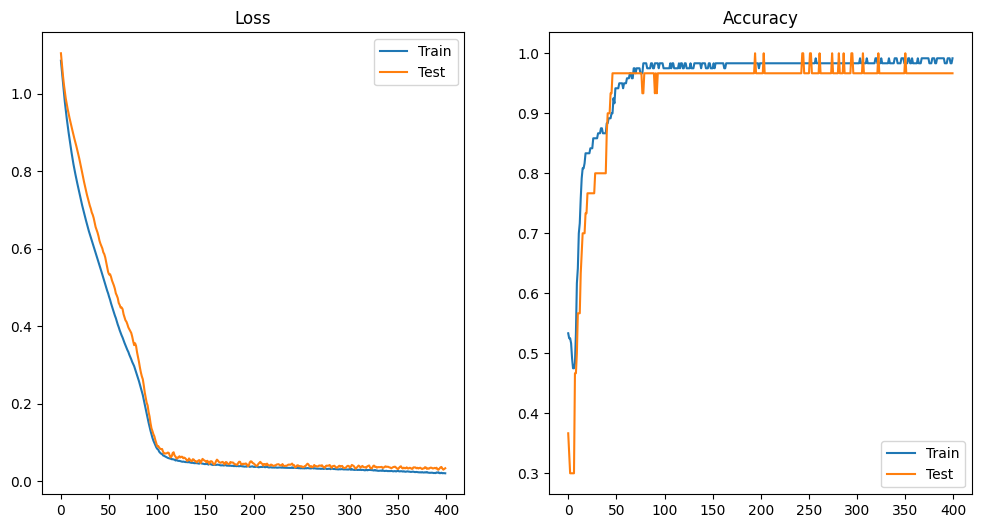

In [9]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Loss')
ax1.legend(['Train','Test'])

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title("Accuracy")
ax2.legend(['Train', 'Test'])

plt.show()

In [10]:
from sklearn.metrics import accuracy_score

preds = model.predict(x_test)
acc = accuracy_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1))
print("Accuracy: %.2f" % acc)

Accuracy: 0.97


L'algoritmo a raggiunto un'accuratezza molto alta. Ma era necessario fare tutte quelle epoche?

L'Early Stopping è una tecnica usata nell'addestramento delle reti neurali per prevenire l'overfitting. In pratica, l'Early Stopping interrompe l'addestramento non appena le prestazioni del modello iniziano a deteriorarsi sul set di validazione, anche se le prestazioni sul set di addestramento continuano a migliorare.

Questo approccio è vantaggioso perché:
1. **Previene l'Overfitting**: Interrompendo l'addestramento al momento giusto, l'Early Stopping mantiene la generalizzazione del modello, evitando che si adatti eccessivamente ai dati di addestramento.
2. **Risparmia Tempo e Risorse**: Riduce il tempo e le risorse computazionali necessarie, poiché evita iterazioni superflue e potenzialmente dannose dell'addestramento.
3. **Ottimizzazione della Prestazione**: Permette di ottenere un modello che ha raggiunto un buon equilibrio tra apprendimento e capacità di generalizzazione, senza la necessità di un tuning manuale eccessivo del numero di epoche.

In [11]:
# early stopping callback
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(12, input_dim=4))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dense(units=15))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dense(units=8))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dense(units=10))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))

criterion = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=criterion, optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=400,
                    callbacks=[early_stopping],
                    validation_data=(x_test, y_test))

Epoch 1/400
4/4 [==============================] - 0s 35ms/step - loss: 1.1052 - accuracy: 0.2667 - val_loss: 1.0915 - val_accuracy: 0.2000
Epoch 2/400
4/4 [==============================] - 0s 5ms/step - loss: 1.0833 - accuracy: 0.3417 - val_loss: 1.0720 - val_accuracy: 0.2333
Epoch 3/400
4/4 [==============================] - 0s 6ms/step - loss: 1.0622 - accuracy: 0.4000 - val_loss: 1.0534 - val_accuracy: 0.3333
Epoch 4/400
4/4 [==============================] - 0s 6ms/step - loss: 1.0427 - accuracy: 0.5333 - val_loss: 1.0347 - val_accuracy: 0.6000
Epoch 5/400
4/4 [==============================] - 0s 6ms/step - loss: 1.0232 - accuracy: 0.6750 - val_loss: 1.0166 - val_accuracy: 0.6333
Epoch 6/400
4/4 [==============================] - 0s 5ms/step - loss: 1.0031 - accuracy: 0.6833 - val_loss: 0.9994 - val_accuracy: 0.6333
Epoch 7/400
4/4 [==============================] - 0s 6ms/step - loss: 0.9845 - accuracy: 0.6917 - val_loss: 0.9827 - val_accuracy: 0.6667
Epoch 8/400
4/4 [=========

4/4 [==============================] - 0s 6ms/step - loss: 0.0576 - accuracy: 0.9750 - val_loss: 0.0541 - val_accuracy: 0.9667
Epoch 118/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0559 - accuracy: 0.9750 - val_loss: 0.0570 - val_accuracy: 0.9667
Epoch 119/400
4/4 [==============================] - 0s 6ms/step - loss: 0.0548 - accuracy: 0.9750 - val_loss: 0.0620 - val_accuracy: 0.9667
Epoch 120/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0557 - accuracy: 0.9750 - val_loss: 0.0670 - val_accuracy: 0.9667
Epoch 121/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0551 - accuracy: 0.9833 - val_loss: 0.0675 - val_accuracy: 0.9333
Epoch 122/400
4/4 [==============================] - 0s 6ms/step - loss: 0.0544 - accuracy: 0.9833 - val_loss: 0.0646 - val_accuracy: 0.9667
Epoch 123/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0547 - accuracy: 0.9833 - val_loss: 0.0580 - val_accuracy: 0.9667
Epoch 124/400
4/4 [========

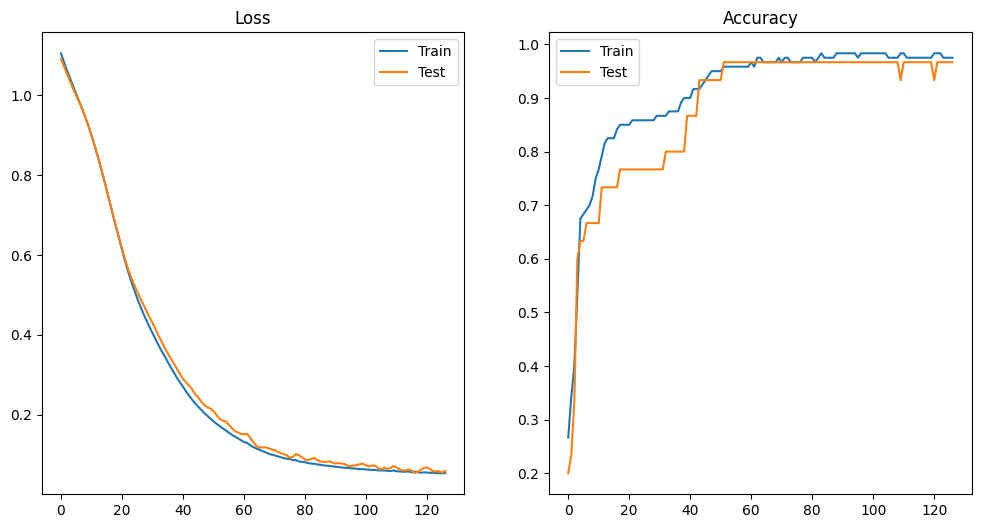

In [12]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Loss')
ax1.legend(['Train','Test'])

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title("Accuracy")
ax2.legend(['Train', 'Test'])

plt.show()

In [13]:
from sklearn.metrics import accuracy_score

preds = model.predict(x_test)
acc = accuracy_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1))
print("Accuracy: %.2f" % acc)

Accuracy: 0.97


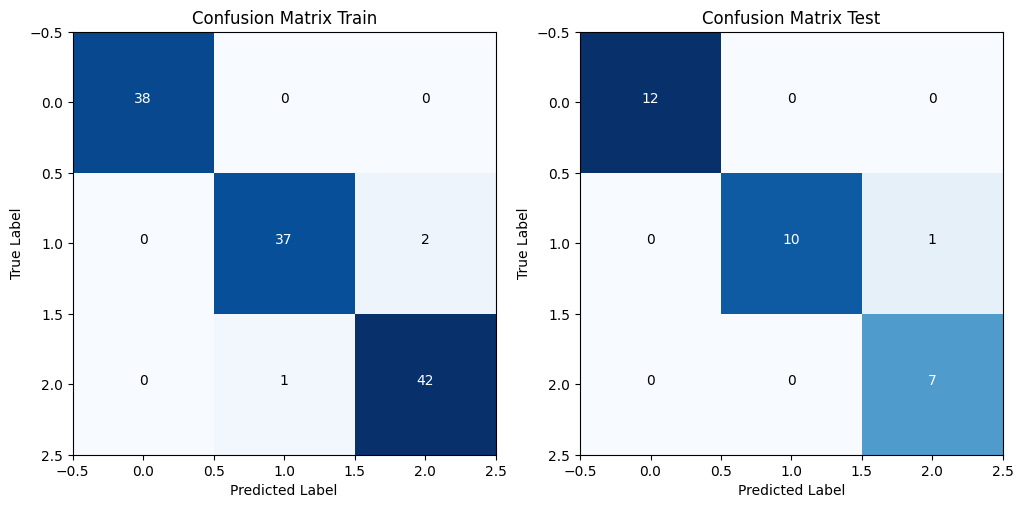

In [14]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import itertools

y_train_hat = [np.argmax(v) for v in model.predict(x_train)]
y_test_hat = [np.argmax(v) for v in model.predict(x_test)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

cf = confusion_matrix([np.argmax(v) for v in y_train], y_train_hat)
ax1.imshow(cf, cmap=plt.cm.Blues)
ax1.set_title("Confusion Matrix Train")
ax1.set_ylabel("True Label")
ax1.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax1.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

cf = confusion_matrix([np.argmax(v) for v in y_test], y_test_hat)
ax2.imshow(cf, cmap=plt.cm.Blues)
ax2.set_title("Confusion Matrix Test")
ax2.set_ylabel("True Label")
ax2.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax2.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

plt.show()

Train AUC 0.981
Test AUC 0.978


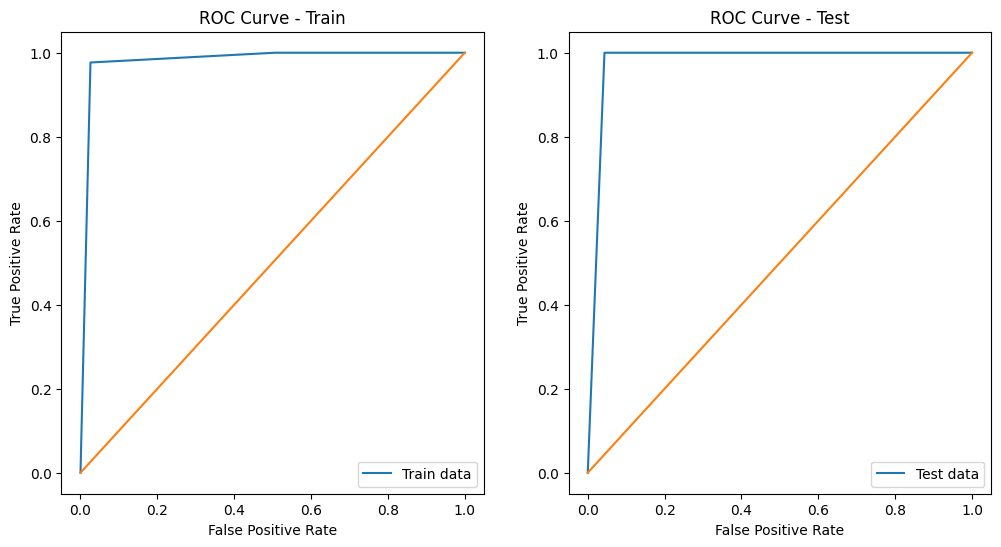

In [15]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
fpr, tpr, _ = roc_curve([np.argmax(v) for v in y_train], y_train_hat, pos_label=2)
roc_auc = auc(fpr, tpr)
print(f'Train AUC {roc_auc:.3f}')

ax1.plot(fpr, tpr, label="Train data")
ax1.plot([0, 1], [0, 1])
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.set_title("ROC Curve - Train")
ax1.legend(loc="lower right")

fpr, tpr, _ = roc_curve([np.argmax(v) for v in y_test], y_test_hat, pos_label=2)
roc_auc = auc(fpr, tpr)
print(f'Test AUC {roc_auc:.3f}')

ax2.plot(fpr, tpr, label="Test data")
ax2.plot([0, 1], [0, 1])
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("ROC Curve - Test")
ax2.legend(loc="lower right")

plt.show()

<a id='section2-2'></a>
### pyTorch

Proviamo ora a creare una rete del tutto simile ma usando pyTorch invece che TensorFlow.

Da principio creiamo il modello usando le classi di pyTorch, la rete create sarà del tutto identica a quella creata con TensorFlow nei passaggi precedenti.

In [18]:
import torch

# build model
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(in_features=4, out_features=12)
        self.fc2 = torch.nn.Linear(in_features=12, out_features=15)
        self.fc3 = torch.nn.Linear(in_features=15, out_features=8)
        self.fc4 = torch.nn.Linear(in_features=8, out_features=10)
        self.output = torch.nn.Linear(in_features=10, out_features=3)
        
        self.criterion = torch.nn.CrossEntropyLoss()
        self.optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
 
    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.nn.functional.relu(self.fc3(x))
        x = torch.nn.functional.relu(self.fc4(x))
        x = self.output(x)
        return x

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=4, out_features=12, bias=True)
  (fc2): Linear(in_features=12, out_features=15, bias=True)
  (fc3): Linear(in_features=15, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=3, bias=True)
  (criterion): CrossEntropyLoss()
)


A questo prunto prepariamo gli input e gli output per essere utilizzati da pyTorch.

Ripartiamo dai dati letti dal file csv, mappiamo la label che vogliamo il nostro modello apprenda a prevedere e quindi trasformiamo tutti i dati in tensori.

In [23]:
# Per pyTorch ci serve che siano dei tensori
x_train_t = torch.FloatTensor(x_train)
x_test_t = torch.FloatTensor(x_test)
y_train_t = torch.FloatTensor(y_train)
y_test_t = torch.FloatTensor(y_test)

# Qui vediamo il primo elmento del nostro insieme di train, convertito in tensore
x_train_t[0]

tensor([-0.4160, -1.5134,  0.0235, -0.1297])

Siamo ora pronti ad addestrare la nostra rete.

L'addestramento, a differenza di quanto avveniva con Keras, necessita di un po' di passaggi manuali ma, proprio per questo motivo, può essere adattato e customizzato alle nostre esigenze specifiche.

In [36]:
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score

# create a class to implement the early stopping
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = np.inf

    def early_stop(self, validation_loss):
        if abs(validation_loss - self.min_validation_loss) < self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                return True
        else:
            self.counter = 0
        
        self.min_validation_loss = min(self.min_validation_loss, validation_loss)
        return False

    
# build model adding the fit function to make it learn
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(in_features=4, out_features=12)
        self.fc2 = torch.nn.Linear(in_features=12, out_features=15)
        self.fc3 = torch.nn.Linear(in_features=15, out_features=8)
        self.fc4 = torch.nn.Linear(in_features=8, out_features=10)
        self.output = torch.nn.Linear(in_features=10, out_features=3)
        
        self.criterion = torch.nn.CrossEntropyLoss()
        self.optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
 
    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.nn.functional.relu(self.fc3(x))
        x = torch.nn.functional.relu(self.fc4(x))
        x = self.output(x)
        return x
    
    def fit(self, x_train, x_test, y_train, y_test):
        self.train()  # Put the model in training mode
        
        # train the network
        num_epoch = 400
        history = { 'accuracy': [], 'loss': [], 'val_accuracy': [], 'val_loss': [] }
        early_stopper = EarlyStopper(patience=10, min_delta=0.001)
        
        train_size = len(y_train)
        test_size = len(y_test)

        for epoch in tqdm(range(num_epoch), desc="num_epochs"):
            self.optimizer.zero_grad()  # Reset gradients at the start of each epoch

            # Facciamo apprendimento sul training.
            y_hat = self.forward(x_train)
            loss = self.criterion(y_hat, y_train)
            loss.backward()
            self.optimizer.step()
            
            # No gradient computation needed for validation data
            with torch.no_grad():
                self.eval()  # Put the model in evaluation mode for validation
                y_test_hat = self.forward(x_test)
                val_loss = self.criterion(y_test_hat, y_test)
                self.train()  # Switch back to training mode
            
            acc = torch.sum(y_train.argmax(dim=1) == y_hat.argmax(dim=1)) / train_size
            val_acc = torch.sum(y_test.argmax(dim=1) == y_test_hat.argmax(dim=1)) / test_size

            history['loss'].append(loss.item())
            history['val_loss'].append(val_loss.item())
            history['accuracy'].append(acc)
            history['val_accuracy'].append(val_acc)

            if early_stopper.early_stop(val_loss):             
                print("Early stopping at epoch:", epoch)
                break

        self.eval()  # Put the model in evaluation mode, training ended
        return history


net = Net()
history = net.fit(x_train_t, x_test_t, y_train_t, y_test_t)

num_epochs:   0%|          | 0/400 [00:00<?, ?it/s]

Early stopping at epoch: 294


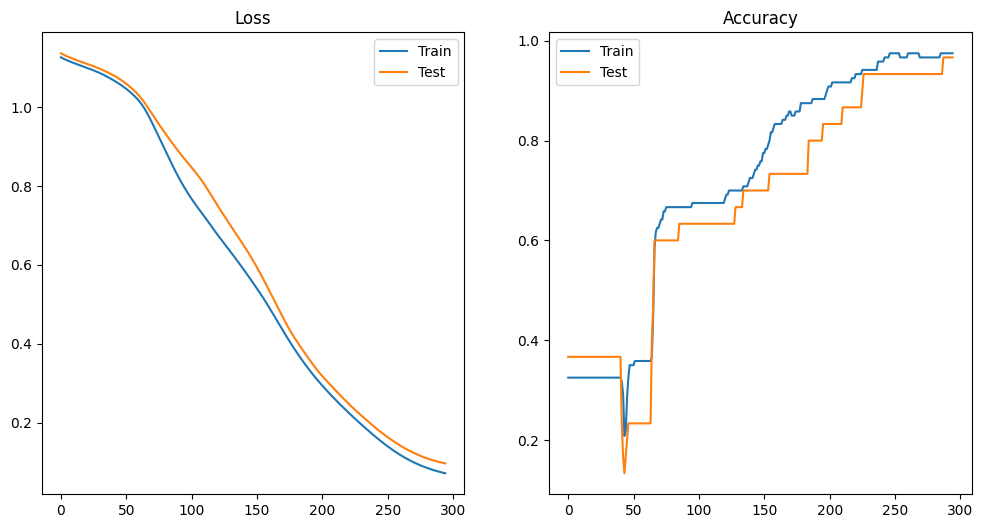

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(history['loss'])
ax1.plot(history['val_loss'])
ax1.set_title('Loss')
ax1.legend(['Train','Test'])

ax2.plot(history['accuracy'])
ax2.plot(history['val_accuracy'])
ax2.set_title("Accuracy")
ax2.legend(['Train', 'Test'])

plt.show()

In [38]:
print("Accuracy: %.2f" % history['accuracy'][-1])

Accuracy: 0.98


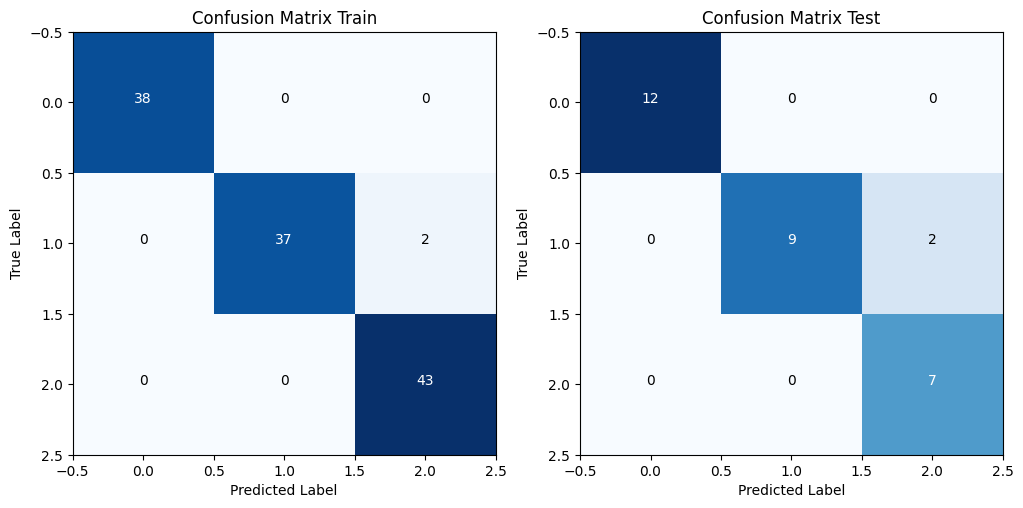

In [28]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import itertools

y_train_hat = net.forward(x_train_t)
y_test_hat = net.forward(x_test_t)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

cf = confusion_matrix(torch.argmax(y_train_t, dim=1).long().detach().numpy(), torch.argmax(y_train_hat, dim=1).detach().numpy())
ax1.imshow(cf, cmap=plt.cm.Blues)
ax1.set_title("Confusion Matrix Train")
ax1.set_ylabel("True Label")
ax1.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax1.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

cf = confusion_matrix(torch.argmax(y_test_t, dim=1).long().detach().numpy(), torch.argmax(y_test_hat, dim=1).detach().numpy())
ax2.imshow(cf, cmap=plt.cm.Blues)
ax2.set_title("Confusion Matrix Test")
ax2.set_ylabel("True Label")
ax2.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax2.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

plt.show()

Al fine di confrontare in modo equo il nostro modello appena addestrato e il tradizionale discriminatore di verosimiglianza, dovremmo esaminare le corrispondenti curve delle caratteristiche operative del ricevitore (ROC). Maggiore è l'area sotto la curva (AUC), migliori saranno le prestazioni del classificatore.

Train AUC 0.987
Test AUC 0.957


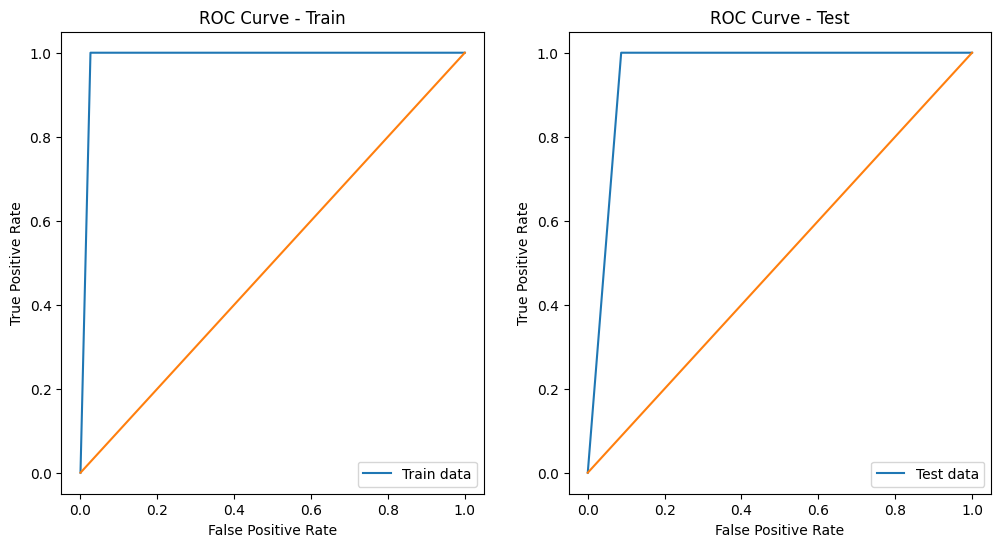

In [29]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
fpr, tpr, _ = roc_curve([np.argmax(v) for v in y_train],
                        [np.argmax(v) for v in y_train_hat.detach().numpy()], pos_label=2)
roc_auc = auc(fpr, tpr)
print(f'Train AUC {roc_auc:.3f}')

ax1.plot(fpr, tpr, label="Train data")
ax1.plot([0, 1], [0, 1])
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.set_title("ROC Curve - Train")
ax1.legend(loc="lower right")

fpr, tpr, _ = roc_curve([np.argmax(v) for v in y_test],
                        [np.argmax(v) for v in y_test_hat.detach().numpy()], pos_label=2)
roc_auc = auc(fpr, tpr)
print(f'Test AUC {roc_auc:.3f}')

ax2.plot(fpr, tpr, label="Test data")
ax2.plot([0, 1], [0, 1])
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("ROC Curve - Test")
ax2.legend(loc="lower right")

plt.show()

<a id='section3'></a>
## Riconosciamo la scrittura

Creiamo una rete neurale deeplearning che permetta di riconoscere dei numeri scritti a mano:

In [1]:
# We must always import the relevant libraries for our problem at hand. NumPy and TensorFlow are required for this example.
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras

Una volta importato tensorflow, possiamo quindi iniziare a preparare i nostri dati, modellarli e quindi addestrarli. Per semplicità, utilizzeremo il più comune esempio di "ciao mondo" per l'apprendimento approfondito, che è il set di dati mnist. È un insieme di cifre scritte a mano, da 0 a 9. Sono le immagini 28x28 di queste cifre scritte a mano. Mostreremo un esempio di utilizzo di dati esterni, ma, per ora, carichiamo questi dati:

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


Quando lavori con i tuoi dati raccolti, è probabile che non siano impacchettato così bene. In questo caso è necessario dedicare un poì di tempo e di impegno in questo passaggio.

Quindi i dati x_train sono le "caratteristiche". In questo caso, le funzionalità sono valori in pixel delle immagini 28x28 di queste cifre 0-9. L'y_train è l'etichetta (è un 0,1,2,3,4,5,6,7,8 o un 9?)

Le varianti di test di queste variabili sono gli esempi "fuori campione" che useremo. Questi sono esempi dai nostri dati che metteremo da parte, riservandoli per testare il modello.

Le reti neurali sono eccezionalmente buone per adattarsi ai dati, al punto che generalmente si adattano troppo ai dati. La nostra vera speranza è che la rete neurale non memorizzi solo i nostri dati e che invece "generalizzi" e impari il vero problema e i modelli ad esso associati.

Diamo un'occhiata a questi dati reali:

In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Bene, possiamo povare a visualizzare questa osservazione:

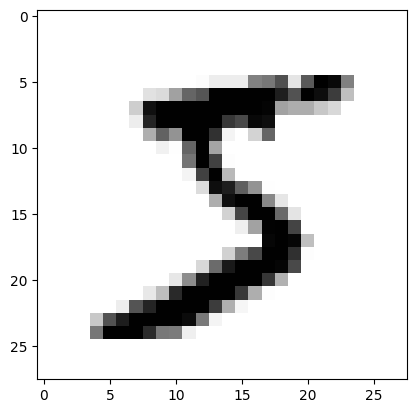

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

Generalmente è una buona idea "normalizzare" i tuoi dati. Questo in genere comporta il ridimensionamento dei dati tra 0 e 1, o forse -1 e positivo 1. Nel nostro caso, ogni "pixel" è una caratteristica, e ogni caratteristica attualmente varia da 0 a 255. Non abbastanza da 0 a 1. Facciamo cambiala con una comoda funzione di utilità:

In [5]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

Ora costruiamo il nostro modello!

In [6]:
model = tf.keras.models.Sequential()

2023-01-20 09:25:54.002516: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Un modello sequenziale è quello che userai la maggior parte del tempo. Usiamolo in questo caso.

Ora dobbiamo inserire tutti gli strati. Ricordi la nostra immagine di rete neurale? Lo strato di input era piatto. Quindi, dobbiamo prendere questa immagine 28x28 e renderla una piatta 1x784. Ci sono molti modi per farlo, ma keras ha uno strato di Flatten creato appositamente per noi, quindi lo useremo.

In [7]:
model.add(tf.keras.layers.Flatten())

Questo servirà come nostro livello di input. Prenderà i dati che gli forniamo e li appiattiremo per noi. Successivamente, vogliamo i nostri livelli nascosti. Andremo con il livello di rete neurale più semplice, che è solo un livello denso. Questo si riferisce al fatto che si tratta di uno strato densamente connesso, il che significa che è "completamente connesso", in cui ogni nodo si collega a ciascun nodo precedente e successivo. Proprio come la nostra immagine.

In [8]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

Questo strato ha 128 unità. La funzione di attivazione è relu, abbreviazione di linear rettificata. Attualmente, relu è la funzione di attivazione che dovrebbe essere predefinita. Ce ne sono molti altri da verificare, ma, se non sai cosa usare, usa relu per iniziare.

Aggiungiamo un altro livello identico per una buona misura.

In [9]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

Ora siamo pronti per un livello di output:

In [10]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

Questo è il nostro ultimo livello. Ha 10 nodi. 1 nodo per la previsione del numero possibile. In questo caso, la nostra funzione di attivazione è una funzione softmax, poiché in realtà stiamo davvero cercando qualcosa di più simile a una distribuzione di probabilità di quale delle possibili opzioni di previsione questa cosa che stiamo passando attraverso le caratteristiche di è. Grande, il nostro modello è fatto.

Ora dobbiamo "compilare" il modello. Qui è dove passiamo le impostazioni per ottimizzare / allenare effettivamente il modello che abbiamo definito.

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Ricorda perché abbiamo scelto relu come funzione di attivazione? La stessa cosa è vera per l'ottimizzatore Adam. È solo un ottimo default per iniziare.

Successivamente, abbiamo la nostra metrica di perdita. La perdita è un calcolo dell'errore. Una rete neurale in realtà non tenta di massimizzare la precisione. Cerca di minimizzare la perdita. Di nuovo, ci sono molte scelte, ma una qualche forma di crossentropia categoriale è un buon inizio per un compito di classificazione come questo.

Ora, facciamo il fit!

In [12]:
history = model.fit(x_train, y_train, epochs=4)

2023-01-20 09:26:00.324493: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2023-01-20 09:26:00.855002: W tensorflow/core/platform/profile_utils/cpu_utils.cc:118] Failed to find bogomips or clock in /proc/cpuinfo; cannot determine CPU frequency


Epoch 1/4
1875/1875 [==============================] - 82s 43ms/step - loss: 0.2599 - accuracy: 0.9237
Epoch 2/4
1875/1875 [==============================] - 84s 45ms/step - loss: 0.1062 - accuracy: 0.9672
Epoch 3/4
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0739 - accuracy: 0.9766
Epoch 4/4
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0550 - accuracy: 0.9819


Mentre ci alleniamo, possiamo vedere la perdita va giù (yay), e la precisione migliora abbastanza rapidamente al 98-99% (doppio yay!)

Questa è la perdita e l'accuratezza dei dati nel campione. Ottenere un'accuratezza elevata e una perdita bassa potrebbe significare che il tuo modello ha imparato come classificare le cifre in generale (è generalizzato) ... o semplicemente memorizzato ogni singolo esempio che hai mostrato (overfit). Questo è il motivo per cui dobbiamo testare dati fuori campione (dati che non abbiamo usato per addestrare il modello).

In [13]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 7s 21ms/step - loss: 0.0953 - accuracy: 0.9709
0.09531068801879883
0.9708999991416931


Infine, fai previsioni!

In [14]:
predictions = model.predict(x_test)
predictions

array([[1.98415354e-10, 7.55562279e-09, 1.52048031e-07, ...,
        9.99999642e-01, 2.36885789e-10, 2.24903644e-07],
       [1.10436704e-09, 1.22198480e-05, 9.99984145e-01, ...,
        5.11294429e-09, 1.00464717e-07, 4.74081874e-13],
       [4.06031084e-08, 9.99408245e-01, 1.29703758e-05, ...,
        2.84985890e-05, 1.17924596e-04, 3.68396468e-06],
       ...,
       [7.35016492e-10, 1.35093774e-06, 2.87361189e-07, ...,
        3.80768688e-05, 2.59916260e-06, 3.58615307e-06],
       [4.81405600e-08, 3.93490787e-08, 1.06584808e-09, ...,
        1.15977370e-08, 1.24467115e-04, 7.37753636e-10],
       [2.99337399e-09, 2.16146379e-10, 2.18781242e-08, ...,
        2.45331078e-12, 1.37185252e-09, 9.87732379e-12]], dtype=float32)

Quel certo non inizia come utile, ma ricorda che queste sono distribuzioni di probabilità. Possiamo ottenere il numero reale semplicemente:

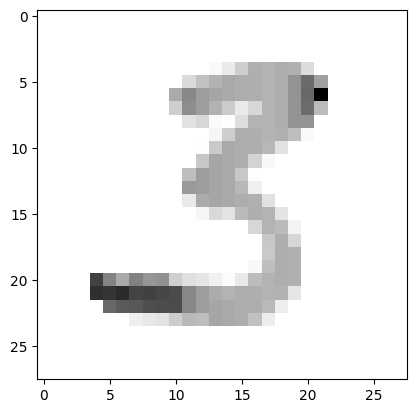

Il nostro algoritmo legge il numero 3


In [15]:
import numpy as np

case_id = 4242

plt.imshow(x_test[case_id], cmap=plt.cm.binary)
plt.show()

print("Il nostro algoritmo legge il numero %d" % np.argmax(predictions[case_id]))

Anche in questo caso proviamo a ricosturire la stessa rete utilizzando pyTorch invece che TensorFlow:

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#build model
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=128)
        self.output = nn.Linear(in_features=128, out_features=10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x
        
net = Net()
print(net)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)


In [17]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

x_train = torch.FloatTensor([torch.flatten(e).tolist() for e in x_train])
x_test = torch.FloatTensor([torch.flatten(e).tolist() for e in x_test])

In [18]:
# train the network
num_epoch = 6
history = { 'accuracy': [], 'loss': [], 'val_accuracy': [], 'val_loss': [] }

for epoch in range(num_epoch):
    y_hat = net.forward(x_train)
    with torch.no_grad():
        y_test_hat = net.forward(x_test)
        
    loss = criterion(y_hat, y_train)
    y_out = torch.FloatTensor([z.tolist().index(max(z)) for z in y_hat])
    acc = torch.sum(y_out == y_train).double() / len(y_train)
    
    val_loss = criterion(y_test_hat, y_test)
    y_test_out = torch.FloatTensor([z.tolist().index(max(z)) for z in y_test_hat])
    val_acc = torch.sum(y_test_out == y_test).double() / len(y_test)
    
    history['loss'].append(loss.detach().numpy())
    history['accuracy'].append(acc.detach().numpy())
    history['val_loss'].append(val_loss.detach().numpy())
    history['val_accuracy'].append(val_acc.detach().numpy())
 
    print('Epoch: %d - loss: %1.4f - accuracy: %1.4f - val_loss: %1.4f - val_accuracy: %1.4f' % (epoch, loss, acc, val_loss, val_acc))
 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 - loss: 2.3042 - accuracy: 0.1190 - val_loss: 2.3045 - val_accuracy: 0.1238
Epoch: 1 - loss: 2.2406 - accuracy: 0.3211 - val_loss: 2.2403 - val_accuracy: 0.3200
Epoch: 2 - loss: 2.0340 - accuracy: 0.5977 - val_loss: 2.0344 - val_accuracy: 0.5986
Epoch: 3 - loss: 1.6977 - accuracy: 0.6294 - val_loss: 1.6980 - val_accuracy: 0.6335
Epoch: 4 - loss: 1.2818 - accuracy: 0.7041 - val_loss: 1.2783 - val_accuracy: 0.7103
Epoch: 5 - loss: 0.9313 - accuracy: 0.7956 - val_loss: 0.9242 - val_accuracy: 0.8042


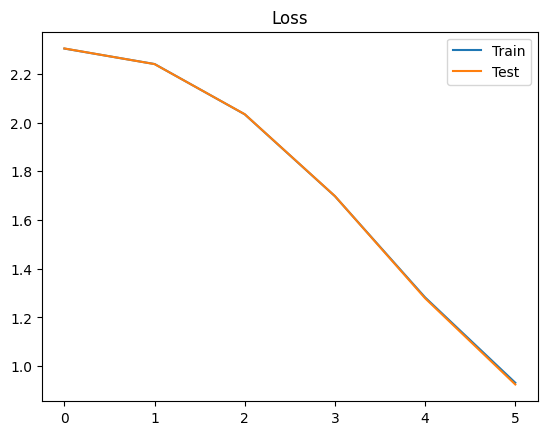

In [19]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss')
plt.legend(['Train','Test'])
plt.show()

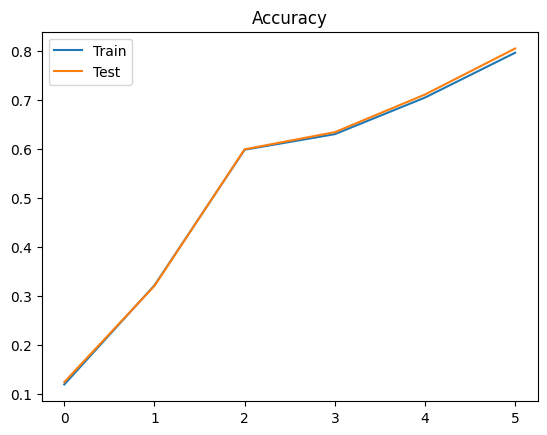

In [20]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Accuracy")
plt.legend(['Train', 'Test'])
plt.show()

In [21]:
from sklearn.metrics import accuracy_score

preds = []
with torch.no_grad():
    for val in x_test:
        y_hat = net.forward(val)
        preds.append(y_hat.argmax().item())

accuracy_score(y_test, preds)

0.7865

In [22]:
with torch.no_grad():
    torch_predictions = net(x_test)
torch_predictions

tensor([[-3.3278, -1.7162, -4.5330,  ...,  6.8934,  0.5334,  2.1265],
        [-1.6744,  0.7314,  5.1185,  ..., -3.5302, -0.2142, -4.0739],
        [-2.0591,  4.4642, -0.4774,  ..., -0.1673,  0.8161, -2.4647],
        ...,
        [-3.5622, -2.1836, -3.2568,  ...,  1.7522,  1.6887,  3.2406],
        [-0.4644, -0.7956, -2.0100,  ..., -0.9265,  3.0167, -0.4931],
        [ 3.5795, -3.3597,  3.3446,  ..., -2.5288, -2.0709, -1.8483]])

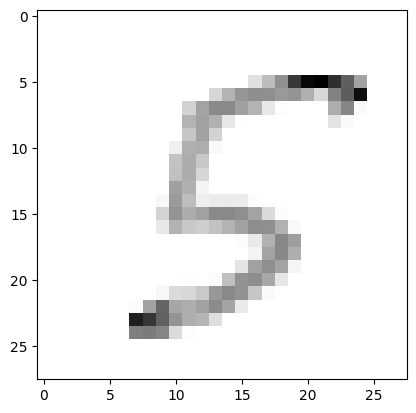

Il nostro algoritmo legge il numero 5


In [23]:
import numpy as np

case_id = 23

plt.imshow(torch.reshape(x_test[case_id], (28, 28)), cmap=plt.cm.binary)
plt.show()

print("Il nostro algoritmo legge il numero %d" % np.argmax(torch_predictions[case_id]))

Eccezionale!
Con questo esempio abbiamo appena scalfito la superficie di ciò che si può fare con queste librerie.
Puoi trovare maggiore documentazione qui:
- [Tensorflow](https://www.tensorflow.org/api_docs/python/)
- [Keras](https://keras.io/layers/about-keras-layers/)
- [pyTorch](https://pytorch.org/docs/stable/index.html)

[Clicca qui per tornare all'inizio della pagina](#start)<a id='start'></a>